In [133]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize

In [68]:
## Normal distribution
normal_dist = norm
# calling norm() freezes the pdf

# NOTE -> this computes biased variance for these distributions

x = 0
# loc and scale can be input to any of the below functions to represent a non-standard normal
normal_dist.pdf(x, loc=10, scale = 1) # loc = mean, scale = std
normal_dist.cdf(x)
normal_dist.logpdf(x)
normal_dist.logcdf(x)

# 1-cdf = sf (survival function)
normal_dist.sf(x)
normal_dist.logsf(x)

# percent point function (inverse cdf)
normal_dist.ppf(x)
# isf (inverse sf)
normal_dist.isf(x)

normal_dist.moment(order=2, loc=0, scale = 1) # 0 based mean for all moments

lb, ub = normal_dist.support()
normal_dist.stats(moments="mvsk") # compute mean, var, skew, kurtosis

normal_dist.interval(confidence=0.5) # 50% confidence interval

mean, std = norm.fit([0.4, 0.5, -0.4, -0.5]) # mean, std (population statistics)
# print(mean, std**2)
# expected value of a function with normal random variables as input
ev = norm.expect(lambda x: x**4)

7.69459862670642e-23


In [62]:
# log normal distribution
# everything above (same functions and all)
from scipy.stats import lognorm


In [64]:
# student's t distribution
# everything above (same functions and all)
from scipy.stats import t

In [92]:
## moment computation for datasets (mean, variance, skew, kurtosis) both biased and unbiased
from scipy.stats import skew, kurtosis

data = np.array([12, 15, 17, 18, 21, 23, 25, 29, 31, 35, 1000])
n = len(data)

mean = np.mean(data)
var = np.var(data, ddof=1) #ddof = 0 means /n -> biased, 1 means / (n-1) -> unbiased)

sk = skew(data, bias= False) # biased for population, unbiased for sample
kurt = kurtosis(data, fisher=True, bias=False) # fisher means -3 (normal has kurt of 0) -> excess kurtosis

np.float64(10.983241413430726)

In [93]:
# covariance, pearson coefficient, spearman's rank
from scipy.stats import pearsonr, spearmanr

x, y = [1, 2, 3, 4, 5, 6, 7], [10, 9, 2.5, 6, 4, 3, 2] # coefficient and 2-sided p value
res = pearsonr(x,y)
print(res)
res2 = spearmanr(x,y)
print(res2)

PearsonRResult(statistic=np.float64(-0.8285038835884277), pvalue=np.float64(0.021280260007523352))
SignificanceResult(statistic=np.float64(-0.7857142857142859), pvalue=np.float64(0.03623846267982714))


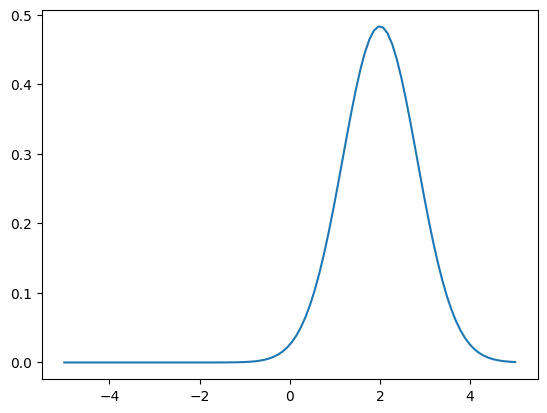

In [115]:
# conditional distributions
from scipy.stats import multivariate_normal, multivariate_t

# mean: μ1∣2​=μ1​+ Σ_12​Σ_22^−1​(x2​−μ2​)
# covariance: Σ1∣2​=Σ11​−Σ12​Σ22^(−1)​Σ21​

# mean vector and covariance
mu = np.array([0, 0])
cov = np.array([[1, 0.8],
                [0.8, 2]])

# Partition
mu1, mu2 = mu[0], mu[1]
Sigma11 = cov[0:1, 0:1]  # scalar in this case
Sigma12 = cov[0:1, 1:2]
Sigma21 = cov[1:2, 0:1]
Sigma22 = cov[1:2, 1:2]

x2 = np.array([5])  # observed value for X2

# Conditional mean and covariance
cond_mean = mu1 + Sigma12 @ np.linalg.inv(Sigma22) @ (x2 - mu2)
cond_cov = Sigma11 - Sigma12 @ np.linalg.inv(Sigma22) @ Sigma21

# Evaluate conditional distribution of X1|X2=x2
x1_vals = np.linspace(-5, 5, 100)
pdf_vals = multivariate_normal(mean=cond_mean.flatten(),
                               cov=cond_cov).pdf(x1_vals)

plt.plot(x1_vals, pdf_vals)

In [128]:
# OLS
data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 4, 5, 4, 6],
        'Y': [3, 5, 7, 8, 10]}
df = pd.DataFrame(data)

# Define dependent and independent variables
Y = df['Y']
X = df[['X1', 'X2']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
coefficients = results.params
# results.aic, results.bic
# print(results.summary())


In [132]:
# MLE

def log_likelihood(parameters, x):

    # define function pdf using the parameters find probability
    # density at data point x. Take the log to be able to add probabilities

    # return -1 * log likelihood
    pass


def fit_model(init_parameters: list, x: pd.DataFrame):

    # define parameter initial guesses with init_parameters
    # get input data with x

    # Minimize negative log-likelihood
    res = minimize(log_likelihood, init_parameters, args=(x.values,),
                bounds=[(None, None), (1e-5, None), (1e-5, None)]) # bounds are the regions to search

    parameter_results = res.x
    return parameter_results

In [134]:
# Durbin Watson
from statsmodels.stats.stattools import durbin_watson

# DW is a test to detect autocorrelation in the residuals from a statistical model or regression

residuals = np.array([0.1, -0.2, 0.3, -0.1, 0.05]) # Example residuals
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

# Close to 2: Indicates no autocorrelation.
# Close to 0: Indicates positive autocorrelation.
# Close to 4: Indicates negative autocorrelation.

Durbin-Watson statistic: 3.4262295081967205


In [137]:
# goodness of fit -> R^2, adjusted R^2, AIC, AICc, BIC, BICc

# R^2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Fit linear regression model
model = LinearRegression().fit(X, y)

# Calculate R-squared
r_squared = r2_score(y, model.predict(X))
print(f"R-squared: {r_squared}")

# R-squared and ajdusted R-squared
def r2(actual: np.ndarray, predicted: np.ndarray):
    """ R2 Score """
    return r2_score(actual, predicted)

def adjr2(actual: np.ndarray, predicted: np.ndarray, rowcount: np.int, featurecount: np.int):
    """ R2 Score """
    return 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount)

# CHI^2
from scipy.stats import chi2_contingency

observed = [16, 18, 16, 14, 12, 12]
expected = [16, 16, 16, 16, 16, 16]

chi2, p_value, dof, expected = chi2_contingency([observed, expected])
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

R-squared: 0.6000000000000001
Chi-square statistic: 1.0479925303454722
p-value: 0.9586027079005394


In [138]:
# goodness of fit with statsmodels (built into OLS)

np.random.seed(0)
X = np.random.rand(100, 2)
y = 1 + 2*X[:,0] - 3*X[:,1] + np.random.randn(100)

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

r2 = model.rsquared
adj_r2 = model.rsquared_adj

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")


# lower aic and bic is better
aic = model.aic
bic = model.bic

print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")

n = model.nobs
k = model.df_model + 1  # includes intercept
aicc = aic + (2*k*(k+1))/(n - k - 1)

print(f"AICc: {aicc:.4f}")

bicc = bic + (k*(k+1))/(n - k - 1)

print(f"BICc: {bicc:.4f}")


R²: 0.5335
Adjusted R²: 0.5239
AIC: 273.0542
BIC: 280.8697
AICc: 273.3042
BICc: 280.9947
